In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Define the SineLayer class
class SineLayer(nn.Module):
    def __init__(self, A, f, phi):
        super(SineLayer, self).__init__()
        self.A = nn.Parameter(torch.tensor(A), requires_grad=True)   # Amplitude
        self.f = nn.Parameter(torch.tensor(f), requires_grad=True)   # Frequency
        self.phi = nn.Parameter(torch.tensor(phi), requires_grad=True) # Phase shift

    def forward(self, t):
        return self.A * torch.sin(self.f * t + self.phi)

# Define the fixed parameters
A = 1.0  # Amplitude
phi = 0.0  # Phase

# Define the frequency for the target wave
f_target = 0.5

# Define the range for the frequency of the learned wave
f_learned_range = np.linspace(0.2, 0.8, 1000)
phi_learned_range = np.linspace(0.0, 100.0, 50) 

# Define the time variable
t = torch.linspace(0, 100, steps=1000)

# Generate the target sine wave using PyTorch
target_sine_layer = SineLayer(A, f_target, phi)
target_wave = target_sine_layer(t).detach().numpy()

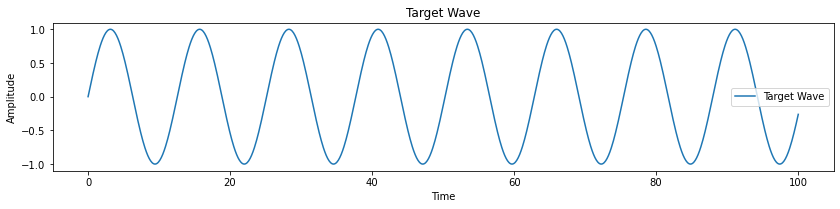

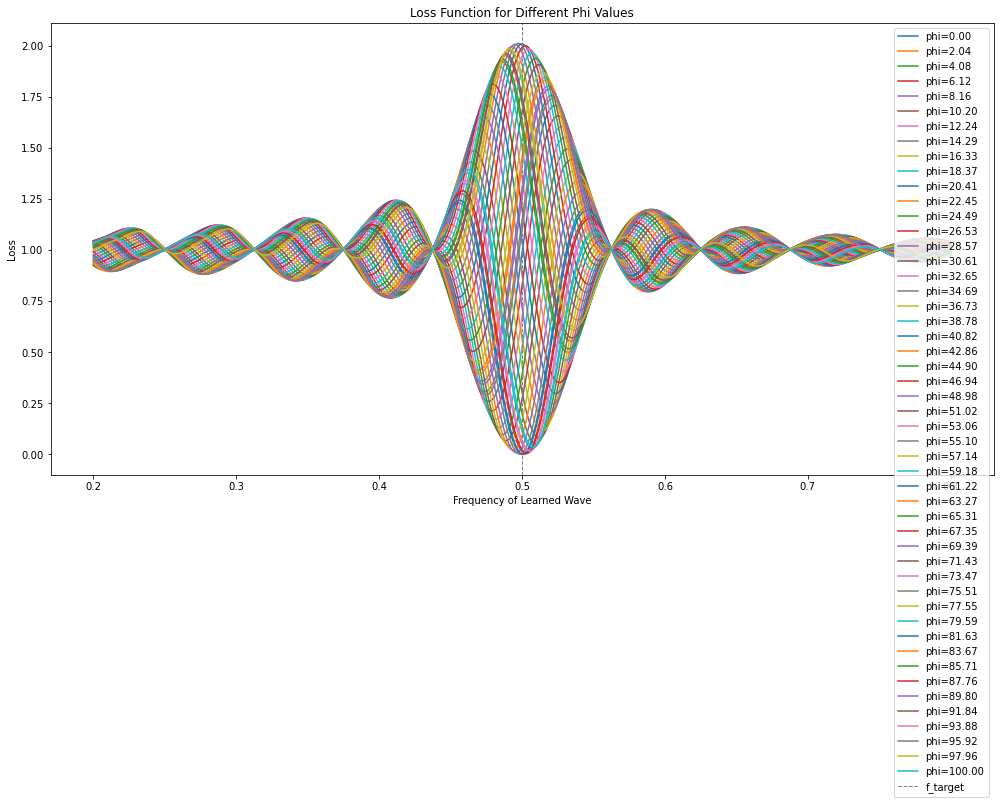

0.5


In [16]:
# Function to generate the learned wave using PyTorch
def generate_learned_wave(f):
    learned_sine_layer = SineLayer(A, 2 * np.pi * f, phi)
    return learned_sine_layer(t).detach().numpy()

def sample_arrays(target, learned, x):
    indices = np.random.choice(len(target), size=x, replace=False)
    sampled_target = target[indices]
    sampled_learned = learned[indices]
    return sampled_target, sampled_learned

# Define the loss functions
def loss_function_m(target, learned):
    return np.mean((target - learned) ** 2)

def loss_function_c(target, learned):
    greater_than = np.sum(learned > target)
    less_than = np.sum(learned < target)
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_a(target, learned):
    diff = learned - target
    greater_than = np.sum(np.abs(diff[diff > 0]))
    less_than = np.sum(np.abs(diff[diff < 0]))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_L(target, learned):
    target, learned = sample_arrays(target, learned, 10000)
    diff = learned - target
    greater_than = np.sum(np.log(np.abs(diff[diff > 0])))
    less_than = np.sum(np.log(np.abs(diff[diff < 0])))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

def loss_function_d1(target, learned):
    diff = learned - target
    greater_than = np.sum(np.log(np.abs(diff[diff > 0])))
    less_than = np.sum(np.log(np.abs(diff[diff < 0])))
    if less_than == 0:
        return np.inf  # Avoid division by zero if no instances are less than
    return greater_than / less_than

# Calculate the loss for each frequency in the range
all_losses = []

for phi_learned in phi_learned_range:
    losses = []
    for f in f_learned_range:
        learned_sine_layer = SineLayer(A, f, phi_learned)
        learned_wave = learned_sine_layer(t).detach().numpy()
        loss = loss_function_m(target_wave, learned_wave)
        losses.append(loss)
    all_losses.append(losses)

# Plot the target wave
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t.numpy(), target_wave, label='Target Wave')
plt.title('Target Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the learned waves for selected frequencies
#selected_frequencies = [0.6, 1, 1.4]
#for f in selected_frequencies:
#    learned_wave = generate_learned_wave(f)
#    plt.plot(t.numpy(), learned_wave, label=f'Learned Wave (f={f:.1f})')
#plt.title('Learned Waves')
#plt.xlabel('Time')
#plt.ylabel('Amplitude')
#plt.legend()

plt.figure(figsize=(14, 10))

for i, phi_learned in enumerate(phi_learned_range):
    plt.plot(f_learned_range, all_losses[i], label=f'phi={phi_learned:.2f}')

plt.axvline(x=f_target, color='gray', linestyle='--', linewidth=1, label='f_target')
plt.title('Loss Function for Different Phi Values')
plt.xlabel('Frequency of Learned Wave')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f_target)

In [3]:
you get beads as phi increases.  strange bands, but yeah, the weird beads get filled in more.  

SyntaxError: invalid syntax (1645748691.py, line 1)

asymptote at infinity as frequency approaches zero? especially with sampling rate you can get it high enough there, but also, it should asymptote at zero as f goes to infinity.  then minimum (and maximum, this should be 2 equations) at the right frequency.  


In [ ]:
amplitude only effects height, not where ideal f is.  

In [ ]:
so make a function that is a function of the 2 waves, and get the idk what to call it.  the hugging wave lol.  
